In [1]:

import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import scanpy as sc
import numpy as np
import tensorflow as tf
import ete3
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import altair as alt
import pertpy as pt

os.chdir('/root/host_home')

2024-08-26 13:09:55.787080: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Filenames

In [2]:
adata_input = 'NPCs_merge/processed_data/NPC_clustered_scvi_zinb_cuda.h5ad'

# Read in data

In [3]:
adata_all = sc.read(adata_input)

In [4]:
adata_all

AnnData object with n_obs × n_vars = 61400 × 17366
    obs: 'Donor', 'lane', 'condition', 'age', 'years_of_illness', 'deltaHY', 'deltaUPDRS', 'deltaADL', 'deltaDOPA', 'gender', 'cultivation_period', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'S_score', 'G2M_score', 'phase', 'cell_types', 'cell_types_abbrev', 'size_factors', 'donor_batch_ID', '_scvi_batch', '_scvi_labels', 'Ferroptosis_pos_corr', 'Ferroptosis_neg_corr', 'Apoptosis_pos_corr', 'Apoptosis_neg_corr', 'Necroptosis_pos_corr', 'Autophagy_pos_corr', 'Pathanatos_pos_corr'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_symbols', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_to

In [5]:
adata_all.obs

,Donor,lane,condition,age,years_of_illness,deltaHY,deltaUPDRS,deltaADL,deltaDOPA,gender,...,donor_batch_ID,_scvi_batch,_scvi_labels,Ferroptosis_pos_corr,Ferroptosis_neg_corr,Apoptosis_pos_corr,Apoptosis_neg_corr,Necroptosis_pos_corr,Autophagy_pos_corr,Pathanatos_pos_corr
AAACCCAAGACTCTAC-23L013539,UKERiC99-R1-007,23L013539,Parkinson,68.0,7.0,2.5,36.0,-0.5,610.0,M,...,UKERiC99-R1-007lp,0,5,0.169352,0.077033,0.250216,-0.237587,-0.091602,0.377379,-0.424826
AAACCCAAGATCACCT-23L013539,UKERiG3G-R1-039,23L013539,Control,69.0,NaN,NaN,NaN,NaN,NaN,F,...,UKERiG3G-R1-039lp,0,6,0.149745,0.136314,-0.121917,0.050405,-0.061390,-0.227485,0.201666
AAACCCACAATAGAGT-23L013539,UKERiAY6-R1-003,23L013539,Parkinson,37.0,4.0,1.0,-1.0,-0.2,800.0,M,...,UKERiAY6-R1-003lp,0,7,0.142598,-0.101434,-0.491021,0.121236,0.154978,-0.024374,0.018684
AAACCCACAGGTTACT-23L013539,UKERiPX7-R1-001,23L013539,Parkinson,49.0,1.0,1.0,0.0,-0.1,1900.0,M,...,UKERiPX7-R1-001lp,0,1,0.123109,0.130886,-0.128565,-0.087606,-0.070649,-0.335904,-0.321727
AAACCCACATCGATAC-23L013539,UKERiG3G-R1-039,23L013539,Control,69.0,NaN,NaN,NaN,NaN,NaN,F,...,UKERiG3G-R1-039lp,0,6,-0.123103,0.168058,-0.305592,0.103618,-0.075603,-0.272896,0.032818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGTAACGG-133,UKERiC99-R1-007,133,Parkinson,68.0,7.0,2.5,36.0,-0.5,610.0,M,...,UKERiC99-R1-007hp,1,6,0.146433,0.651488,-0.270597,-0.323299,-0.026858,-0.021119,-0.170837
TTTGTCAGTTCTCATT-133,UKERi88H-R1-002,133,Parkinson,63.0,6.0,2.0,7.0,-0.3,640.0,F,...,UKERi88H-R1-002hp,1,4,-0.164614,-0.024673,-0.128804,-0.211998,-0.060078,0.226322,0.222895
TTTGTCATCAGCAACT-133,UKERiC99-R1-007,133,Parkinson,68.0,7.0,2.5,36.0,-0.5,610.0,M,...,UKERiC99-R1-007hp,1,2,0.170543,-0.009415,0.270060,-0.082318,-0.062593,-0.053498,-0.439944
TTTGTCATCTACGAGT-133,UKERiAY6-R1-003,133,Parkinson,37.0,4.0,1.0,-1.0,-0.2,800.0,M,...,UKERiAY6-R1-003hp,1,5,0.149880,-0.267353,-0.107135,-0.240706,-0.046011,0.174363,-0.872391


# Compositional analysis - all

In [6]:
adata = adata_all.copy()

In [7]:
del adata.uns
del adata.obsm
del adata.varm
del adata.layers
del adata.obsp

In [8]:
drops_obs = ['lane', 'condition', 'age', 'years_of_illness', 'deltaHY', 'deltaUPDRS', 'deltaADL', 'deltaDOPA', 'gender', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'S_score', 'G2M_score', 'phase', 'cell_types_abbrev', 'size_factors', 'donor_batch_ID', '_scvi_batch', '_scvi_labels', 'Ferroptosis_pos_corr', 'Ferroptosis_neg_corr', 'Apoptosis_pos_corr', 'Apoptosis_neg_corr', 'Necroptosis_pos_corr', 'Autophagy_pos_corr', 'Pathanatos_pos_corr']
drops_var = ['gene_ids', 'feature_types', 'genome', 'gene_symbols', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_genes', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_genes_batch_aware']

for i in drops_obs:
    del adata.obs[i]

for i in drops_var:
    del adata.var[i]


In [9]:
adata.obs['Donor_unique'] = adata.obs['Donor'].astype(str)+'_'+adata.obs['cultivation_period'].astype(str)

In [10]:
adata

AnnData object with n_obs × n_vars = 61400 × 17366
    obs: 'Donor', 'cultivation_period', 'cell_types', 'Donor_unique'

In [11]:
adata.obs

,Donor,cultivation_period,cell_types,Donor_unique
AAACCCAAGACTCTAC-23L013539,UKERiC99-R1-007,lp,NSC1a,UKERiC99-R1-007_lp
AAACCCAAGATCACCT-23L013539,UKERiG3G-R1-039,lp,NSC1b,UKERiG3G-R1-039_lp
AAACCCACAATAGAGT-23L013539,UKERiAY6-R1-003,lp,NSC2a,UKERiAY6-R1-003_lp
AAACCCACAGGTTACT-23L013539,UKERiPX7-R1-001,lp,Apop. NSC,UKERiPX7-R1-001_lp
AAACCCACATCGATAC-23L013539,UKERiG3G-R1-039,lp,NSC1b,UKERiG3G-R1-039_lp
...,...,...,...,...
TTTGTCAGTGTAACGG-133,UKERiC99-R1-007,hp,NSC1b,UKERiC99-R1-007_hp
TTTGTCAGTTCTCATT-133,UKERi88H-R1-002,hp,NCSC,UKERi88H-R1-002_hp
TTTGTCATCAGCAACT-133,UKERiC99-R1-007,hp,Glial precursors,UKERiC99-R1-007_hp
TTTGTCATCTACGAGT-133,UKERiAY6-R1-003,hp,NSC1a,UKERiAY6-R1-003_hp


In [12]:
pd.crosstab(adata.obs['cultivation_period'], adata.obs['Donor'])

Donor,UKERi1JF-R1-018,UKERiG3G-R1-039,UKERi1E4-R1-003,UKERiO3H-R1-005,UKERi82A-R1-002,UKERiJ2C-R1-015,UKERiM89-R1-005,UKERiC99-R1-007,UKERiR66-R1-007,UKERiAY6-R1-003,UKERiPX7-R1-001,UKERi88H-R1-002
cultivation_period,,,,,,,,,,,,
lp,1498,2042,2406,3256,2496,1686,2143,2051,2340,2591,5354,2980
hp,1394,3232,3446,2746,852,2163,1034,4582,2693,2979,2157,3279


In [13]:
adata.obs['cultivation_period'].cat.categories

Index(['lp', 'hp'], dtype='object')

In [14]:
pd.crosstab(adata.obs['Donor'], adata.obs['cell_types'])

cell_types,Apop. NCSC,Apop. NSC,Glial precursors,Immature neurons,NCSC,NSC1a,NSC1b,NSC2a,NSC2b
Donor,,,,,,,,,
UKERi1JF-R1-018,3,169,87,84,53,948,631,792,125
UKERiG3G-R1-039,4,424,157,99,271,2549,1287,379,104
UKERi1E4-R1-003,65,262,87,172,3174,942,500,538,112
UKERiO3H-R1-005,32,465,59,112,409,3180,1331,342,72
UKERi82A-R1-002,63,384,409,66,509,1047,660,133,77
UKERiJ2C-R1-015,11,426,46,163,308,1414,1146,256,79
UKERiM89-R1-005,9,192,16,71,121,1380,744,528,116
UKERiC99-R1-007,20,244,276,85,437,2526,1685,970,390
UKERiR66-R1-007,9,249,279,119,639,1763,1132,622,221


## Build model

In [15]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_types",
    sample_identifier="Donor_unique",
    covariate_obs=['cultivation_period'],
)
sccoda_data

MuData object with n_obs × n_vars = 61424 × 17375
  2 modalities
    rna:	61400 x 17366
      obs:	'Donor', 'cultivation_period', 'cell_types', 'Donor_unique'
    coda:	24 x 9
      obs:	'Donor', 'cultivation_period'
      var:	'n_cells'

## Visualize distribution

In [16]:
if not os.path.exists('NPCs_merge/figures/Composition'):
    # Create a new directory because it does not exist
    os.mkdir('NPCs_merge/figures/Composition')
    print("The new directory: figures/Composition is created!")
else: 
    print("The directory (figures/Composition) already exists")

The directory (figures/Composition) already exists


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/pertpy/tools/_coda/_base_coda.py:1711: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


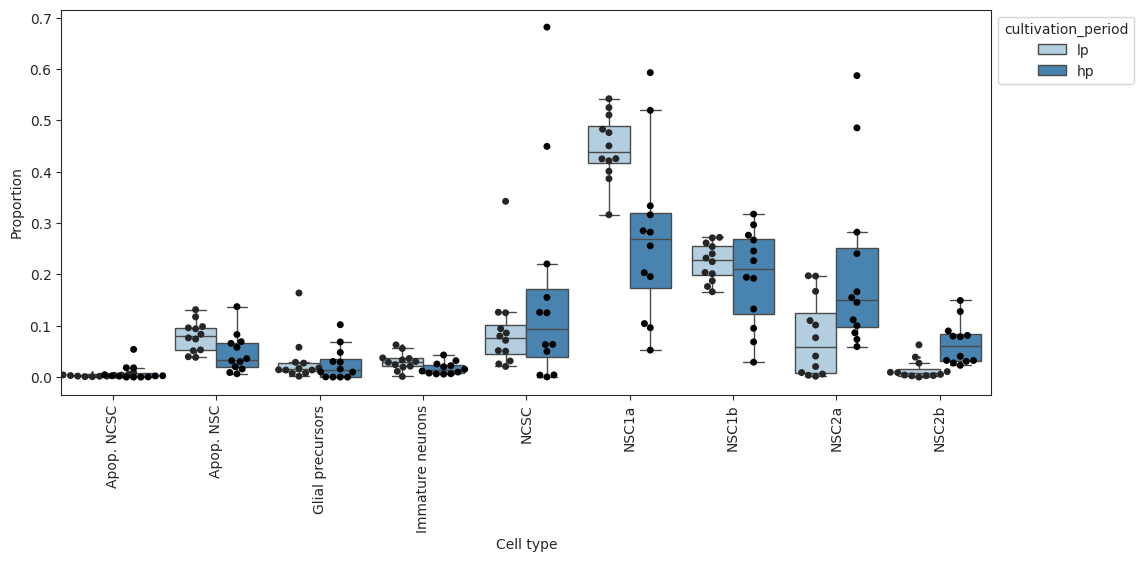

In [17]:
#Show an overview about cell type distributions across conditions as boxplot
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="cultivation_period",
    figsize=(12, 5),
    add_dots=True,

    plot_facets = False
)
plt.savefig('NPCs_merge/figures/Composition/all_celltype_composition.pdf', bbox_inches='tight')
plt.show()

In [18]:
col6 = adata_all.uns['cell_types_colors']

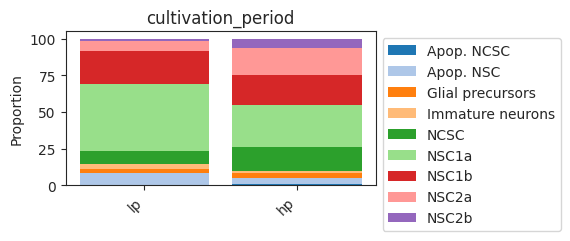

In [19]:
#Show an overview about cell type distributions across conditions as stacked barplot
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="cultivation_period", figsize=(4, 2)
)
plt.show()

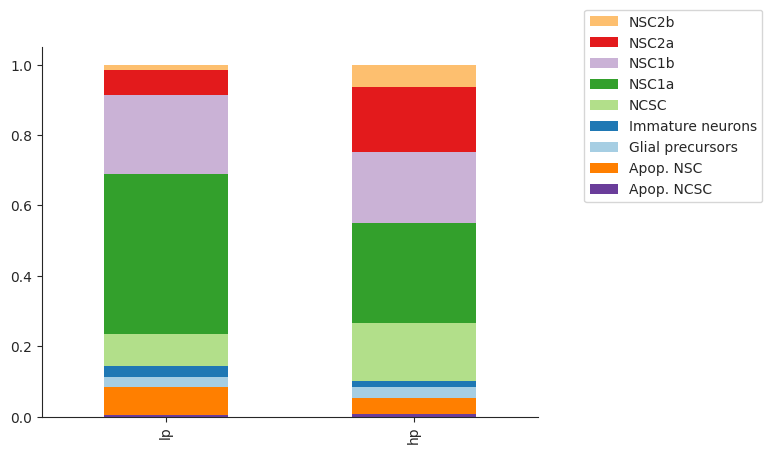

In [20]:
ax = pd.crosstab(adata.obs['cultivation_period'], adata.obs['cell_types'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col6, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/all_cultivation_period_celltype_composition.pdf', bbox_inches='tight')

plt.show()

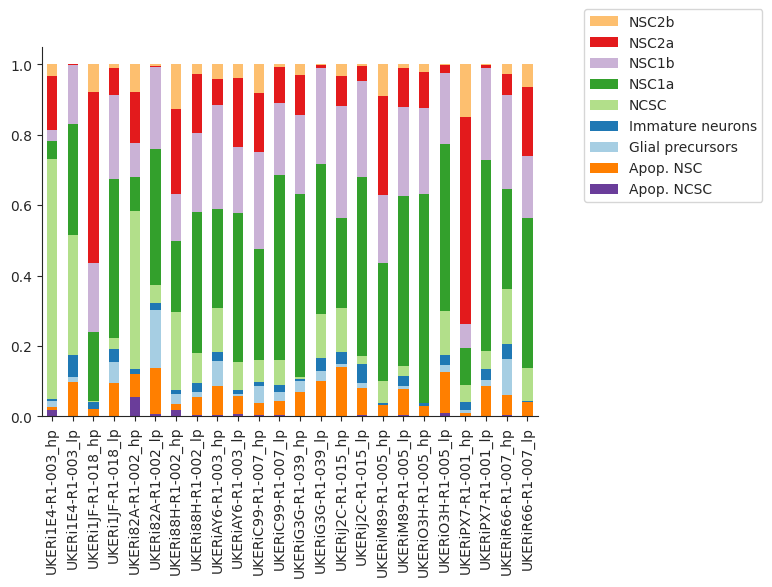

In [21]:
ax = pd.crosstab(adata.obs['Donor_unique'], adata.obs['cell_types'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col6, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/all_Donor_celltype_composition.pdf', bbox_inches='tight')

plt.show()

In [22]:
col_donors = adata_all.uns['Donor_colors']

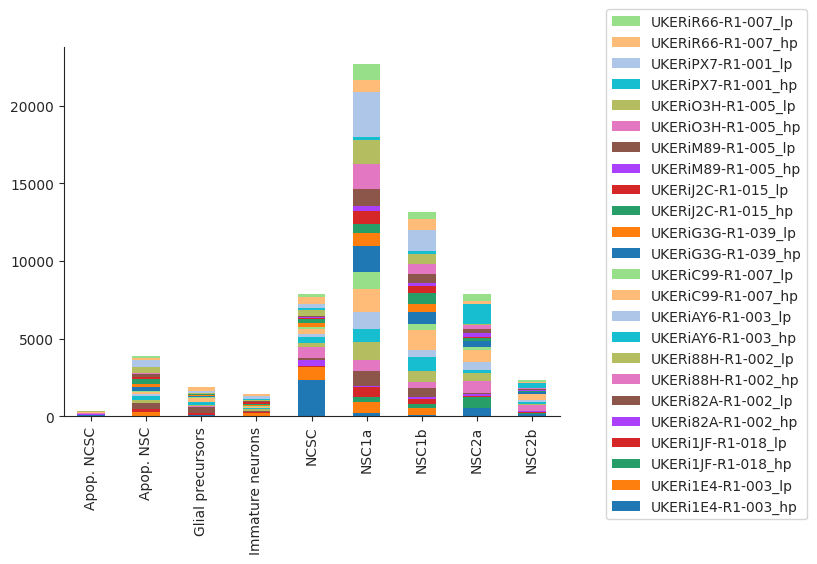

In [23]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor_unique'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/all_celltype_donor_unique_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

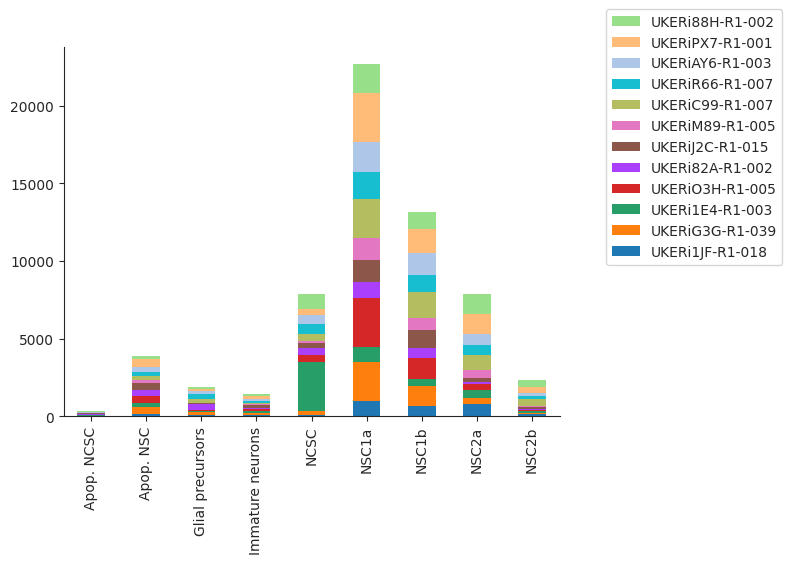

In [24]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/all_celltype_donor_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

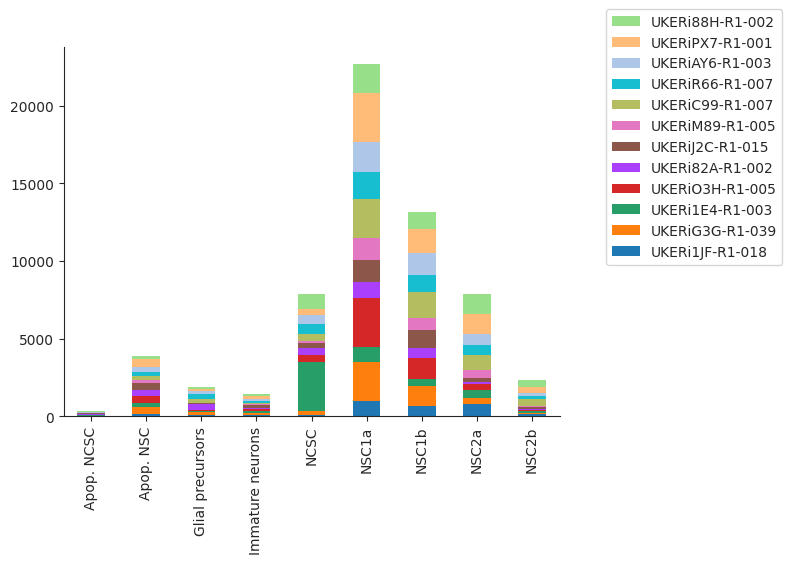

In [25]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/all_celltype_donor_unique_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

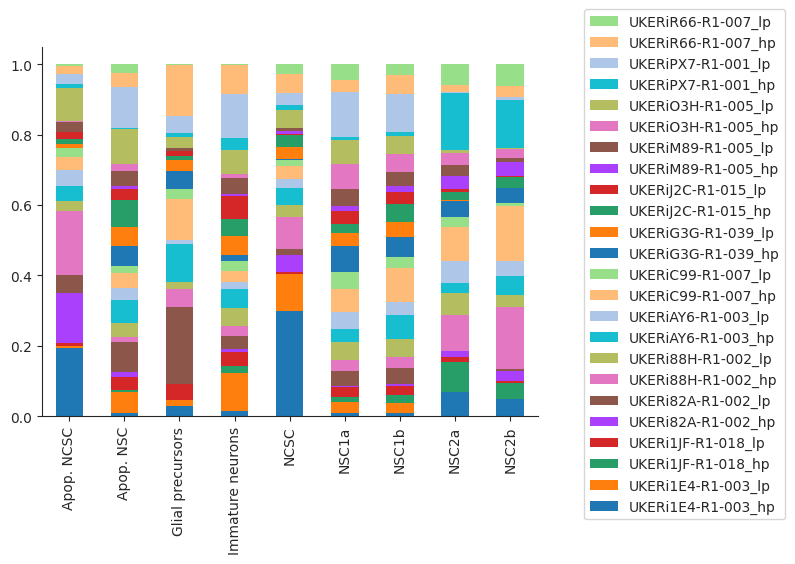

In [26]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor_unique'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/all_celltype_donor_composition.pdf', bbox_inches='tight')
plt.show()

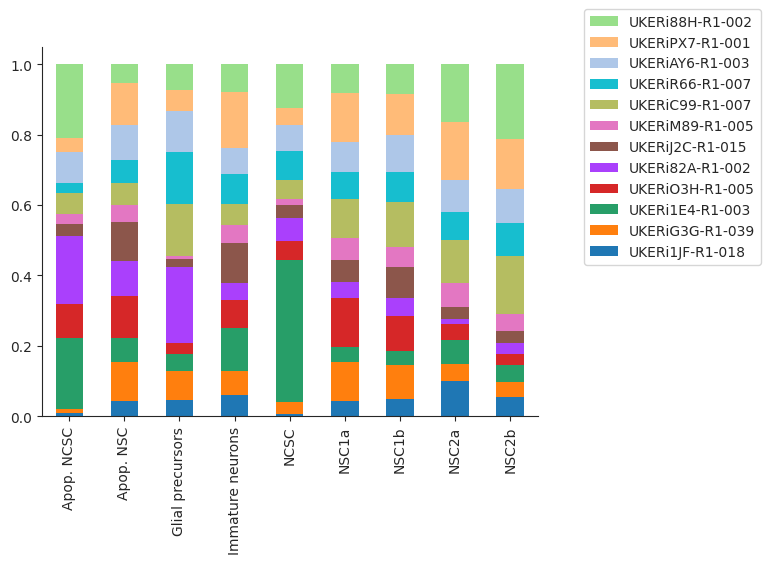

In [27]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/all_celltype_donor_unique_composition.pdf', bbox_inches='tight')
plt.show()

In [28]:
col_condition = adata_all.uns['cultivation_period_colors']

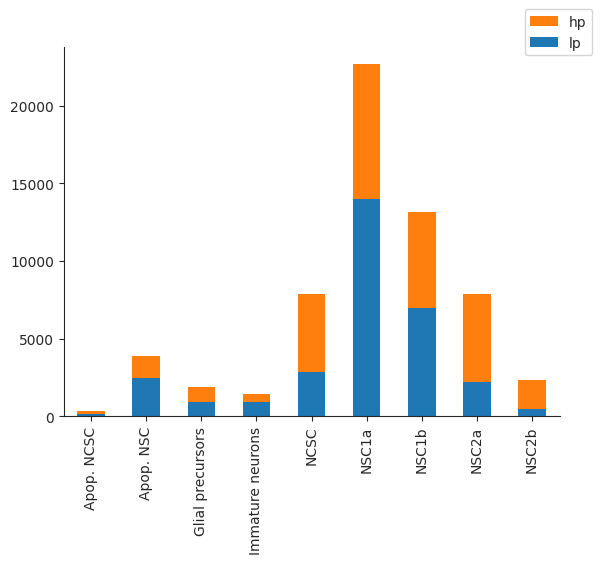

In [29]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['cultivation_period'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_condition, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/all_celltype_cultivation_period_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

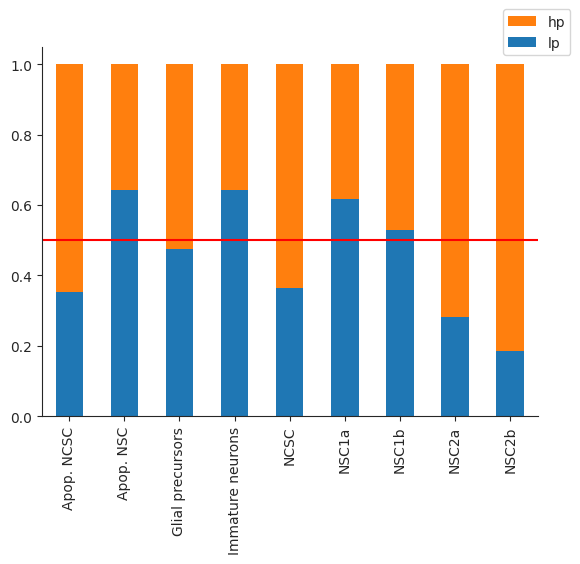

In [30]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['cultivation_period'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col_condition, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.axhline(y=0.5, color='r', linestyle='-')
plt.savefig('NPCs_merge/figures/Composition/all_celltype_cultivation_period_composition.pdf', bbox_inches='tight')
plt.show()

## Run interference

In [31]:
# Run scCODA with each cell type as the reference
cell_types = adata.obs.cell_types.cat.categories
results_cycle = pd.DataFrame(index=cell_types, columns=["times_credible"]).fillna(0)

for ct in cell_types:
    print(f"Reference: {ct}")

    # Run inference
    model_temp = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="cultivation_period",
    reference_cell_type=ct,
    )
    sccoda_model.run_nuts(model_temp, modality_key="coda", rng_key=1234)
    
    # Select credible effects
    sccoda_model.set_fdr(model_temp, 0.2)
    cred_eff = sccoda_model.credible_effects(model_temp, modality_key="coda")
    cred_eff.index = cred_eff.index.droplevel(level=0)

    # add up credible effects
    results_cycle["times_credible"] += cred_eff.astype("int")

Reference: Apop. NCSC


Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|███████████████████████| 11000/11000 [1:02:08<00:00,  2.95it/s, 511 steps of size 1.60e-02. acc. prob=0.91]


Reference: Apop. NSC


sample: 100%|█████████████████████████| 11000/11000 [52:06<00:00,  3.52it/s, 255 steps of size 2.02e-02. acc. prob=0.90]


Reference: Glial precursors


sample: 100%|█████████████████████████| 11000/11000 [47:32<00:00,  3.86it/s, 255 steps of size 2.03e-02. acc. prob=0.85]


Reference: Immature neurons


sample: 100%|█████████████████████████| 11000/11000 [45:16<00:00,  4.05it/s, 127 steps of size 2.11e-02. acc. prob=0.83]


Reference: NCSC


sample: 100%|█████████████████████████| 11000/11000 [44:25<00:00,  4.13it/s, 255 steps of size 2.16e-02. acc. prob=0.84]


Reference: NSC1a


sample: 100%|█████████████████████████| 11000/11000 [37:27<00:00,  4.90it/s, 127 steps of size 2.69e-02. acc. prob=0.82]


Reference: NSC1b


sample: 100%|█████████████████████████| 11000/11000 [33:23<00:00,  5.49it/s, 127 steps of size 2.80e-02. acc. prob=0.81]


Reference: NSC2a


sample: 100%|█████████████████████████| 11000/11000 [42:37<00:00,  4.30it/s, 127 steps of size 2.33e-02. acc. prob=0.77]


Reference: NSC2b


sample: 100%|█████████████████████████| 11000/11000 [44:21<00:00,  4.13it/s, 255 steps of size 2.19e-02. acc. prob=0.82]


In [32]:
# Calculate percentages
results_cycle["pct_credible"] = results_cycle["times_credible"]/len(cell_types)
results_cycle["is_credible"] = results_cycle["pct_credible"] > 0.5
print(results_cycle)



                  times_credible  pct_credible  is_credible
Apop. NCSC                     1      0.111111        False
Apop. NSC                      8      0.888889         True
Glial precursors               7      0.777778         True
Immature neurons               5      0.555556         True
NCSC                           5      0.555556         True
NSC1a                          8      0.888889         True
NSC1b                          7      0.777778         True
NSC2a                          8      0.888889         True
NSC2b                          8      0.888889         True


# Compositional analysis - Ctrl

In [33]:
adata = adata_all[adata_all.obs['condition'] == 'Control'].copy()

In [34]:
del adata.uns
del adata.obsm
del adata.varm
del adata.layers
del adata.obsp

In [35]:
drops_obs = ['lane', 'condition', 'age', 'years_of_illness', 'deltaHY', 'deltaUPDRS', 'deltaADL', 'deltaDOPA', 'gender', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'S_score', 'G2M_score', 'phase', 'cell_types_abbrev', 'size_factors', 'donor_batch_ID', '_scvi_batch', '_scvi_labels', 'Ferroptosis_pos_corr', 'Ferroptosis_neg_corr', 'Apoptosis_pos_corr', 'Apoptosis_neg_corr', 'Necroptosis_pos_corr', 'Autophagy_pos_corr', 'Pathanatos_pos_corr']
drops_var = ['gene_ids', 'feature_types', 'genome', 'gene_symbols', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_genes', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_genes_batch_aware']

for i in drops_obs:
    del adata.obs[i]

for i in drops_var:
    del adata.var[i]


In [36]:
adata.obs['Donor_unique'] = adata.obs['Donor'].astype(str)+'_'+adata.obs['cultivation_period'].astype(str)

In [37]:
adata

AnnData object with n_obs × n_vars = 23368 × 17366
    obs: 'Donor', 'cultivation_period', 'cell_types', 'Donor_unique'

In [38]:
adata.obs

,Donor,cultivation_period,cell_types,Donor_unique
AAACCCAAGATCACCT-23L013539,UKERiG3G-R1-039,lp,NSC1b,UKERiG3G-R1-039_lp
AAACCCACATCGATAC-23L013539,UKERiG3G-R1-039,lp,NSC1b,UKERiG3G-R1-039_lp
AAACCCAGTACGACAG-23L013539,UKERi1E4-R1-003,lp,NCSC,UKERi1E4-R1-003_lp
AAACCCAGTAGCCAGA-23L013539,UKERi1E4-R1-003,lp,NSC1a,UKERi1E4-R1-003_lp
AAACCCAGTCTAACTG-23L013539,UKERi1JF-R1-018,lp,Apop. NSC,UKERi1JF-R1-018_lp
...,...,...,...,...
TTTCCTCGTAAGTAGT-133,UKERi1E4-R1-003,hp,NSC1a,UKERi1E4-R1-003_hp
TTTCCTCTCTATCCTA-133,UKERi1E4-R1-003,hp,NCSC,UKERi1E4-R1-003_hp
TTTGGTTTCCCTCAGT-133,UKERi1JF-R1-018,hp,NSC1b,UKERi1JF-R1-018_hp
TTTGGTTTCCTCAATT-133,UKERiG3G-R1-039,hp,NSC2a,UKERiG3G-R1-039_hp


In [39]:
pd.crosstab(adata.obs['cultivation_period'], adata.obs['Donor'])

Donor,UKERi1JF-R1-018,UKERiG3G-R1-039,UKERi1E4-R1-003,UKERiO3H-R1-005,UKERi82A-R1-002
cultivation_period,,,,,
lp,1498,2042,2406,3256,2496
hp,1394,3232,3446,2746,852


In [40]:
adata.obs['cultivation_period'].cat.categories

Index(['lp', 'hp'], dtype='object')

In [41]:
pd.crosstab(adata.obs['Donor'], adata.obs['cell_types'])

cell_types,Apop. NCSC,Apop. NSC,Glial precursors,Immature neurons,NCSC,NSC1a,NSC1b,NSC2a,NSC2b
Donor,,,,,,,,,
UKERi1JF-R1-018,3,169,87,84,53,948,631,792,125
UKERiG3G-R1-039,4,424,157,99,271,2549,1287,379,104
UKERi1E4-R1-003,65,262,87,172,3174,942,500,538,112
UKERiO3H-R1-005,32,465,59,112,409,3180,1331,342,72
UKERi82A-R1-002,63,384,409,66,509,1047,660,133,77


## Build model

In [42]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_types",
    sample_identifier="Donor_unique",
    covariate_obs=['cultivation_period'],
)
sccoda_data

MuData object with n_obs × n_vars = 23378 × 17375
  2 modalities
    rna:	23368 x 17366
      obs:	'Donor', 'cultivation_period', 'cell_types', 'Donor_unique'
    coda:	10 x 9
      obs:	'Donor', 'cultivation_period'
      var:	'n_cells'

## Visualize distribution

In [43]:
if not os.path.exists('NPCs_merge/figures/Composition'):
    # Create a new directory because it does not exist
    os.mkdir('NPCs_merge/figures/Composition')
    print("The new directory: figures/Composition is created!")
else: 
    print("The directory (figures/Composition) already exists")

The directory (figures/Composition) already exists


/usr/local/lib/python3.10/dist-packages/pertpy/tools/_coda/_base_coda.py:1711: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


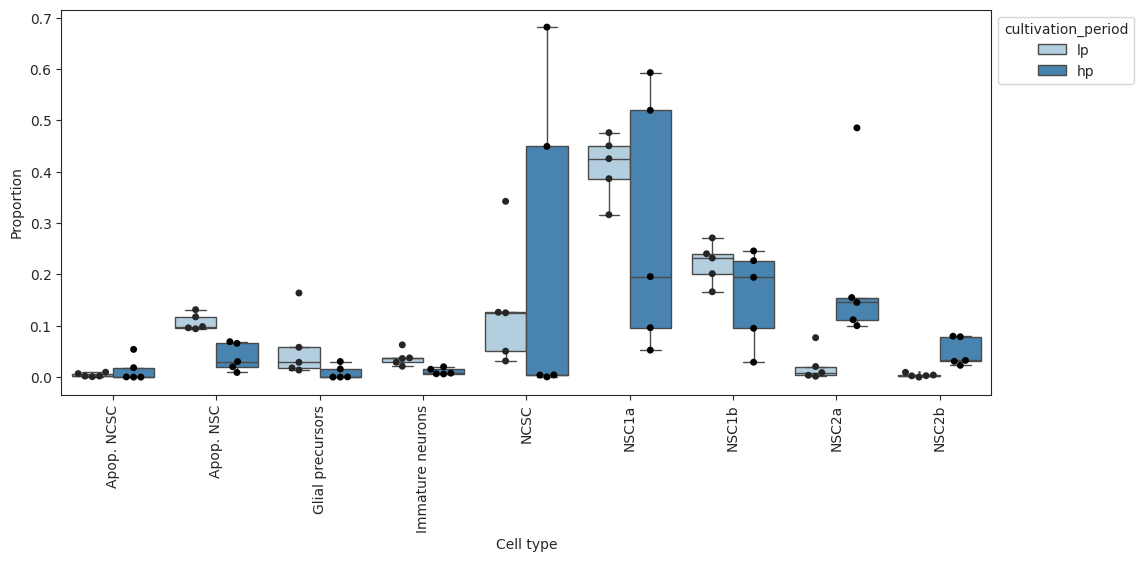

In [44]:
#Show an overview about cell type distributions across conditions as boxplot
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="cultivation_period",
    figsize=(12, 5),
    add_dots=True,

    plot_facets = False
)
plt.savefig('NPCs_merge/figures/Composition/Ctrl_celltype_composition.pdf', bbox_inches='tight')
plt.show()

In [45]:
col6 = adata_all.uns['cell_types_colors']

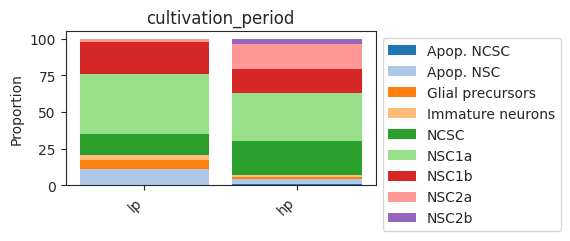

In [46]:
#Show an overview about cell type distributions across conditions as stacked barplot
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="cultivation_period", figsize=(4, 2)
)
plt.show()

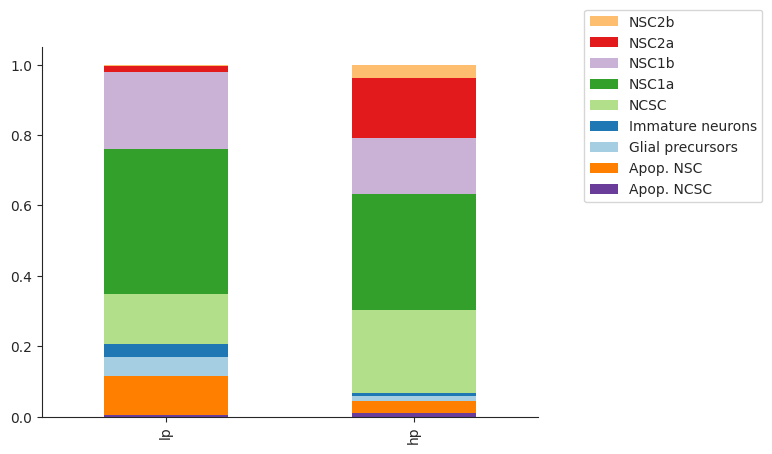

In [47]:
ax = pd.crosstab(adata.obs['cultivation_period'], adata.obs['cell_types'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col6, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/Ctrl_cultivation_period_celltype_composition.pdf', bbox_inches='tight')

plt.show()

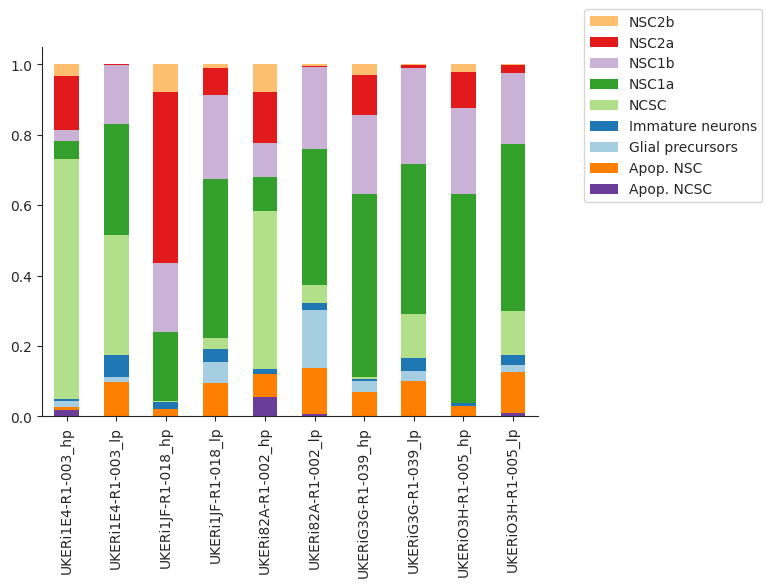

In [48]:
ax = pd.crosstab(adata.obs['Donor_unique'], adata.obs['cell_types'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col6, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/Ctrl_Donor_celltype_composition.pdf', bbox_inches='tight')

plt.show()

In [49]:
col_donors = adata_all.uns['Donor_colors']

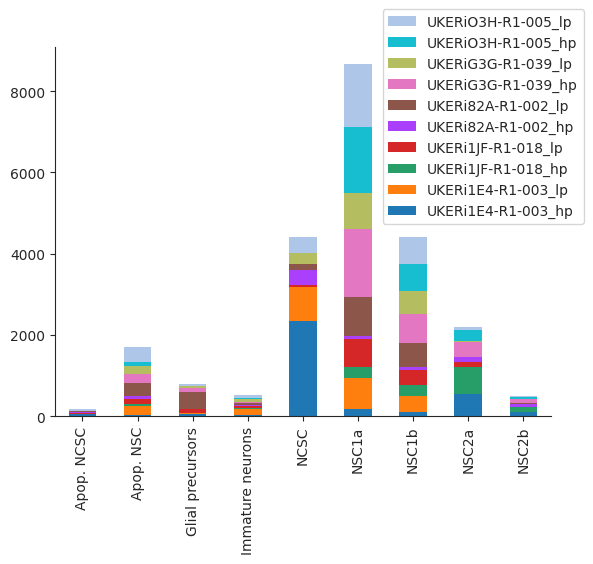

In [50]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor_unique'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/Ctrl_celltype_donor_unique_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

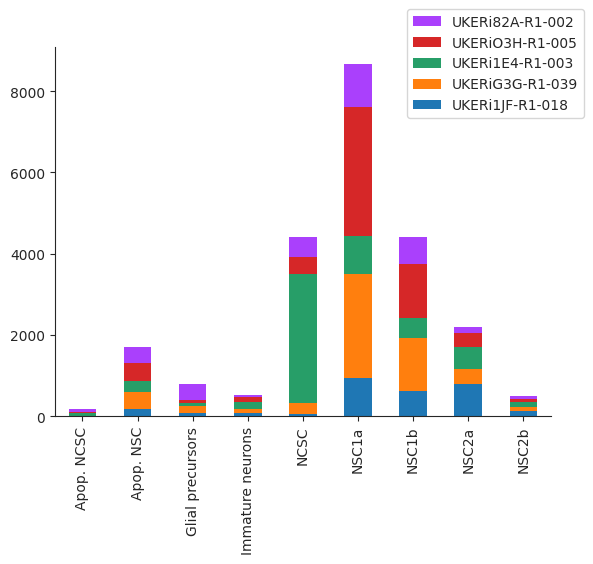

In [51]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/Ctrl_celltype_donor_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

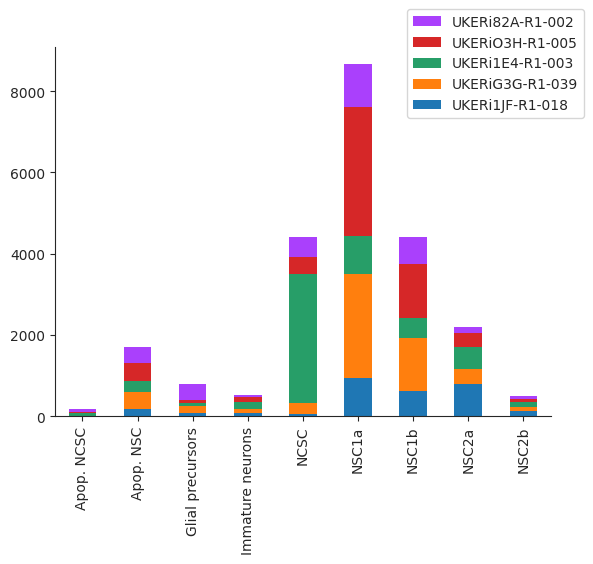

In [52]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/Ctrl_celltype_donor_unique_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

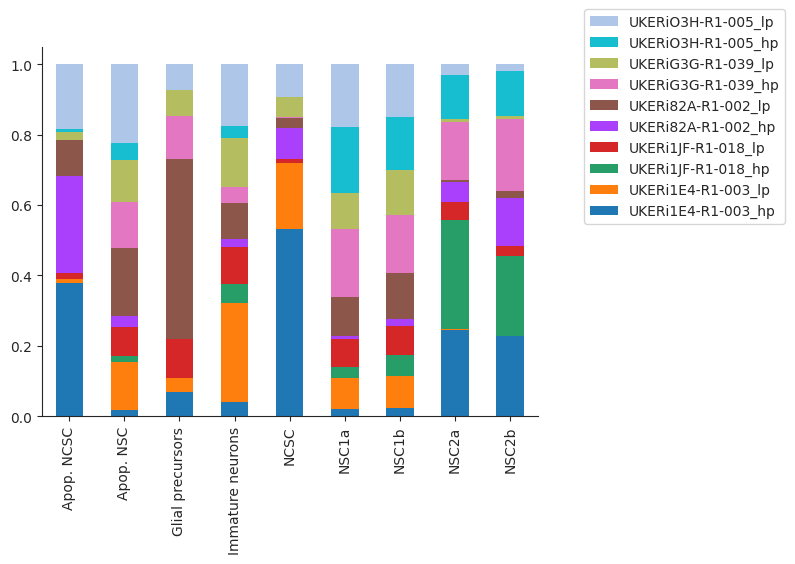

In [53]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor_unique'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/Ctrl_celltype_donor_composition.pdf', bbox_inches='tight')
plt.show()

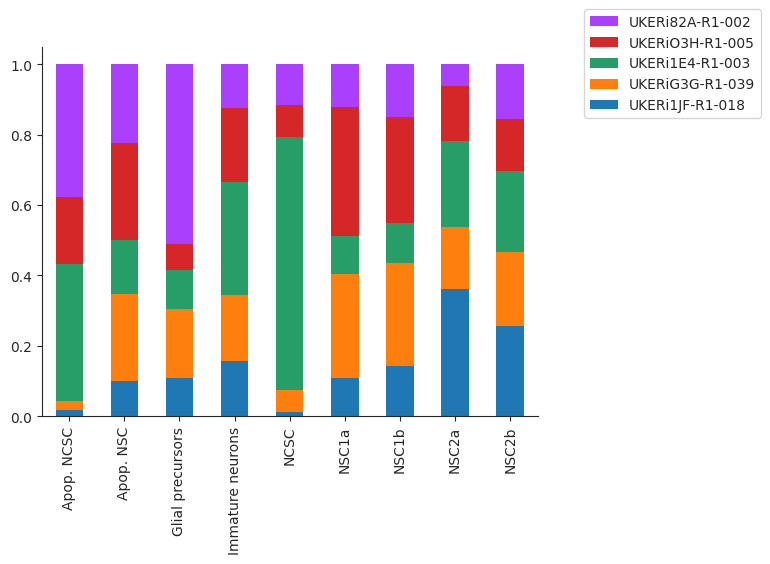

In [54]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/Ctrl_celltype_donor_unique_composition.pdf', bbox_inches='tight')
plt.show()

In [55]:
col_condition = adata_all.uns['cultivation_period_colors']

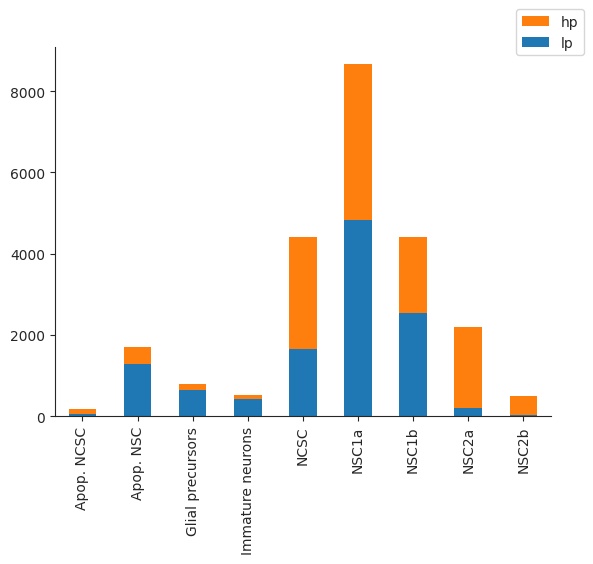

In [56]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['cultivation_period'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_condition, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/Ctrl_celltype_cultivation_period_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

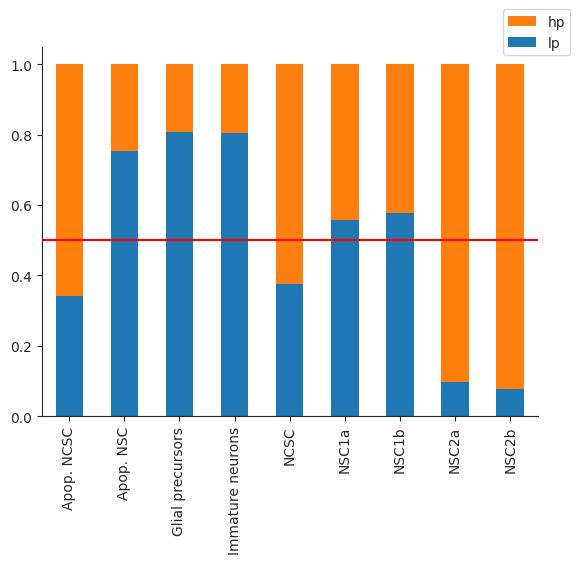

In [57]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['cultivation_period'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col_condition, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.axhline(y=0.5, color='r', linestyle='-')
plt.savefig('NPCs_merge/figures/Composition/Ctrl_celltype_cultivation_period_composition.pdf', bbox_inches='tight')
plt.show()

## Run interference

In [58]:
# Run scCODA with each cell type as the reference
cell_types = adata.obs.cell_types.cat.categories
results_cycle = pd.DataFrame(index=cell_types, columns=["times_credible"]).fillna(0)

for ct in cell_types:
    print(f"Reference: {ct}")

    # Run inference
    model_temp = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="cultivation_period",
    reference_cell_type=ct,
    )
    sccoda_model.run_nuts(model_temp, modality_key="coda", rng_key=1234)
    
    # Select credible effects
    sccoda_model.set_fdr(model_temp, 0.2)
    cred_eff = sccoda_model.credible_effects(model_temp, modality_key="coda")
    cred_eff.index = cred_eff.index.droplevel(level=0)

    # add up credible effects
    results_cycle["times_credible"] += cred_eff.astype("int")

Reference: Apop. NCSC


Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|█████████████████████████| 11000/11000 [41:59<00:00,  4.37it/s, 127 steps of size 1.96e-02. acc. prob=0.82]


Reference: Apop. NSC


sample: 100%|█████████████████████████| 11000/11000 [35:32<00:00,  5.16it/s, 127 steps of size 2.44e-02. acc. prob=0.86]


Reference: Glial precursors


sample: 100%|█████████████████████████| 11000/11000 [28:39<00:00,  6.40it/s, 127 steps of size 3.32e-02. acc. prob=0.66]


Reference: Immature neurons


sample: 100%|█████████████████████████| 11000/11000 [56:05<00:00,  3.27it/s, 127 steps of size 1.57e-02. acc. prob=0.92]


Reference: NCSC


sample: 100%|█████████████████████████| 11000/11000 [32:21<00:00,  5.67it/s, 127 steps of size 2.83e-02. acc. prob=0.82]


Reference: NSC1a


sample: 100%|█████████████████████████| 11000/11000 [40:53<00:00,  4.48it/s, 127 steps of size 2.30e-02. acc. prob=0.92]


Reference: NSC1b


sample: 100%|█████████████████████████| 11000/11000 [40:25<00:00,  4.54it/s, 127 steps of size 2.30e-02. acc. prob=0.88]


Reference: NSC2a


sample: 100%|█████████████████████████| 11000/11000 [40:48<00:00,  4.49it/s, 127 steps of size 2.36e-02. acc. prob=0.83]


Reference: NSC2b


sample: 100%|█████████████████████████| 11000/11000 [55:01<00:00,  3.33it/s, 127 steps of size 1.60e-02. acc. prob=0.88]


In [59]:
# Calculate percentages
results_cycle["pct_credible"] = results_cycle["times_credible"]/len(cell_types)
results_cycle["is_credible"] = results_cycle["pct_credible"] > 0.5
print(results_cycle)



                  times_credible  pct_credible  is_credible
Apop. NCSC                     2      0.222222        False
Apop. NSC                      5      0.555556         True
Glial precursors               4      0.444444        False
Immature neurons               3      0.333333        False
NCSC                           5      0.555556         True
NSC1a                          8      0.888889         True
NSC1b                          5      0.555556         True
NSC2a                          8      0.888889         True
NSC2b                          3      0.333333        False


# Compositional analysis - sPD

In [6]:
adata = adata_all[adata_all.obs['condition'] == 'Parkinson'].copy()

In [7]:
del adata.uns
del adata.obsm
del adata.varm
del adata.layers
del adata.obsp

In [8]:
drops_obs = ['lane', 'condition', 'age', 'years_of_illness', 'deltaHY', 'deltaUPDRS', 'deltaADL', 'deltaDOPA', 'gender', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'S_score', 'G2M_score', 'phase', 'cell_types_abbrev', 'size_factors', 'donor_batch_ID', '_scvi_batch', '_scvi_labels', 'Ferroptosis_pos_corr', 'Ferroptosis_neg_corr', 'Apoptosis_pos_corr', 'Apoptosis_neg_corr', 'Necroptosis_pos_corr', 'Autophagy_pos_corr', 'Pathanatos_pos_corr']
drops_var = ['gene_ids', 'feature_types', 'genome', 'gene_symbols', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_genes', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_genes_batch_aware']

for i in drops_obs:
    del adata.obs[i]

for i in drops_var:
    del adata.var[i]


In [9]:
adata.obs['Donor_unique'] = adata.obs['Donor'].astype(str)+'_'+adata.obs['cultivation_period'].astype(str)

In [10]:
adata

AnnData object with n_obs × n_vars = 38032 × 17366
    obs: 'Donor', 'cultivation_period', 'cell_types', 'Donor_unique'

In [11]:
adata.obs

,Donor,cultivation_period,cell_types,Donor_unique
AAACCCAAGACTCTAC-23L013539,UKERiC99-R1-007,lp,NSC1a,UKERiC99-R1-007_lp
AAACCCACAATAGAGT-23L013539,UKERiAY6-R1-003,lp,NSC2a,UKERiAY6-R1-003_lp
AAACCCACAGGTTACT-23L013539,UKERiPX7-R1-001,lp,Apop. NSC,UKERiPX7-R1-001_lp
AAACCCAGTAATGCGG-23L013539,UKERiPX7-R1-001,lp,NSC1a,UKERiPX7-R1-001_lp
AAACCCAGTCCAGCAC-23L013539,UKERiAY6-R1-003,lp,NSC1b,UKERiAY6-R1-003_lp
...,...,...,...,...
TTTGTCAGTGTAACGG-133,UKERiC99-R1-007,hp,NSC1b,UKERiC99-R1-007_hp
TTTGTCAGTTCTCATT-133,UKERi88H-R1-002,hp,NCSC,UKERi88H-R1-002_hp
TTTGTCATCAGCAACT-133,UKERiC99-R1-007,hp,Glial precursors,UKERiC99-R1-007_hp
TTTGTCATCTACGAGT-133,UKERiAY6-R1-003,hp,NSC1a,UKERiAY6-R1-003_hp


In [12]:
pd.crosstab(adata.obs['cultivation_period'], adata.obs['Donor'])

Donor,UKERiJ2C-R1-015,UKERiM89-R1-005,UKERiC99-R1-007,UKERiR66-R1-007,UKERiAY6-R1-003,UKERiPX7-R1-001,UKERi88H-R1-002
cultivation_period,,,,,,,
lp,1686,2143,2051,2340,2591,5354,2980
hp,2163,1034,4582,2693,2979,2157,3279


In [13]:
adata.obs['cultivation_period'].cat.categories

Index(['lp', 'hp'], dtype='object')

In [14]:
pd.crosstab(adata.obs['Donor'], adata.obs['cell_types'])

cell_types,Apop. NCSC,Apop. NSC,Glial precursors,Immature neurons,NCSC,NSC1a,NSC1b,NSC2a,NSC2b
Donor,,,,,,,,,
UKERiJ2C-R1-015,11,426,46,163,308,1414,1146,256,79
UKERiM89-R1-005,9,192,16,71,121,1380,744,528,116
UKERiC99-R1-007,20,244,276,85,437,2526,1685,970,390
UKERiR66-R1-007,9,249,279,119,639,1763,1132,622,221
UKERiAY6-R1-003,29,380,222,105,580,1933,1370,729,222
UKERiPX7-R1-001,13,461,112,227,384,3129,1548,1299,338
UKERi88H-R1-002,68,210,137,111,979,1862,1105,1287,500


## Build model

In [15]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_types",
    sample_identifier="Donor_unique",
    covariate_obs=['cultivation_period'],
)
sccoda_data

MuData object with n_obs × n_vars = 38046 × 17375
  2 modalities
    rna:	38032 x 17366
      obs:	'Donor', 'cultivation_period', 'cell_types', 'Donor_unique'
    coda:	14 x 9
      obs:	'Donor', 'cultivation_period'
      var:	'n_cells'

## Visualize distribution

In [16]:
if not os.path.exists('NPCs_merge/figures/Composition'):
    # Create a new directory because it does not exist
    os.mkdir('NPCs_merge/figures/Composition')
    print("The new directory: figures/Composition is created!")
else: 
    print("The directory (figures/Composition) already exists")

The directory (figures/Composition) already exists


/usr/local/lib/python3.10/dist-packages/pertpy/tools/_coda/_base_coda.py:1711: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


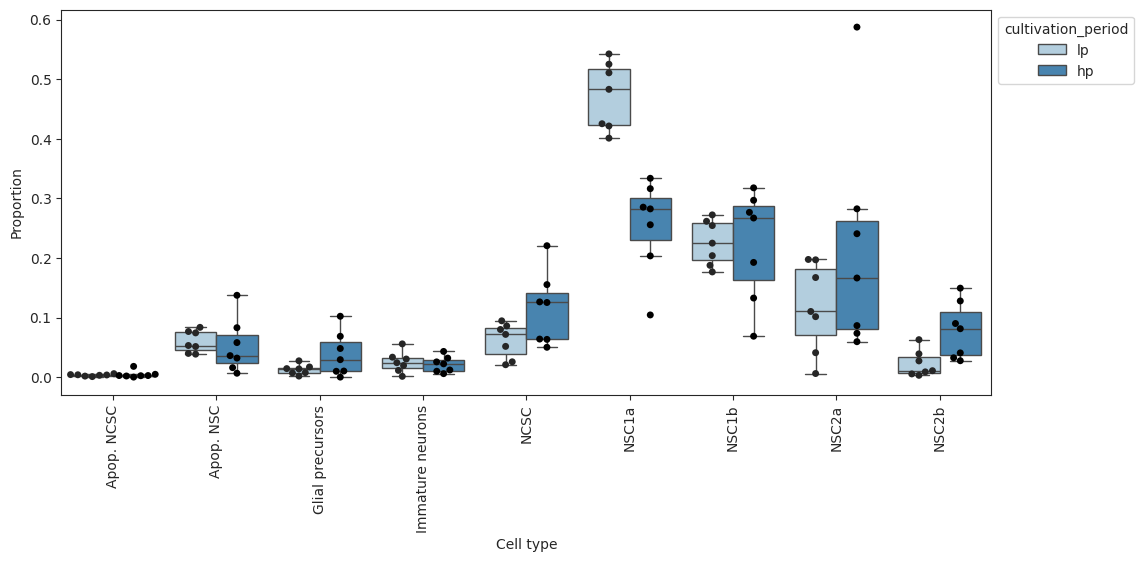

In [17]:
#Show an overview about cell type distributions across conditions as boxplot
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="cultivation_period",
    figsize=(12, 5),
    add_dots=True,

    plot_facets = False
)
plt.savefig('NPCs_merge/figures/Composition/sPD_celltype_composition.pdf', bbox_inches='tight')
plt.show()

In [18]:
col6 = adata_all.uns['cell_types_colors']

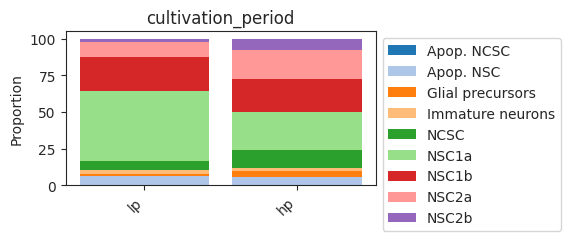

In [19]:
#Show an overview about cell type distributions across conditions as stacked barplot
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="cultivation_period", figsize=(4, 2)
)
plt.show()

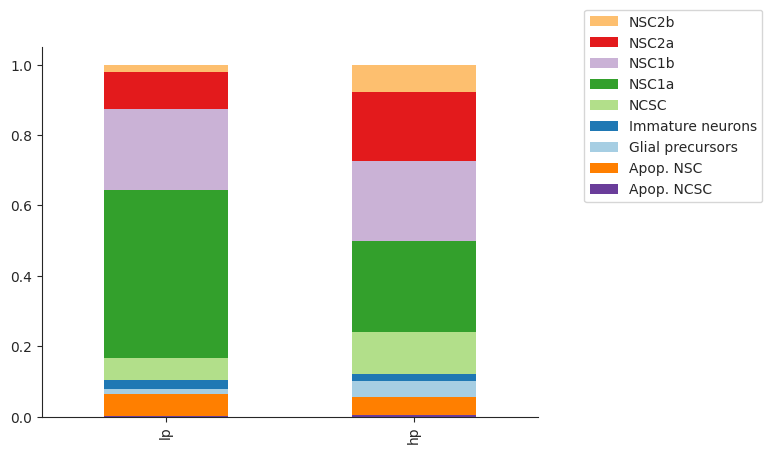

In [20]:
ax = pd.crosstab(adata.obs['cultivation_period'], adata.obs['cell_types'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col6, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/sPD_cultivation_period_celltype_composition.pdf', bbox_inches='tight')

plt.show()

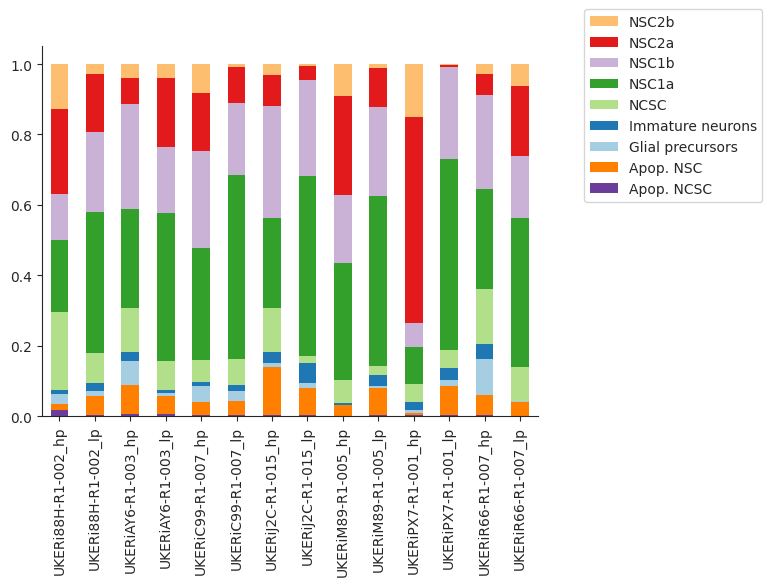

In [21]:
ax = pd.crosstab(adata.obs['Donor_unique'], adata.obs['cell_types'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col6, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/sPD_Donor_celltype_composition.pdf', bbox_inches='tight')

plt.show()

In [22]:
col_donors = adata_all.uns['Donor_colors']

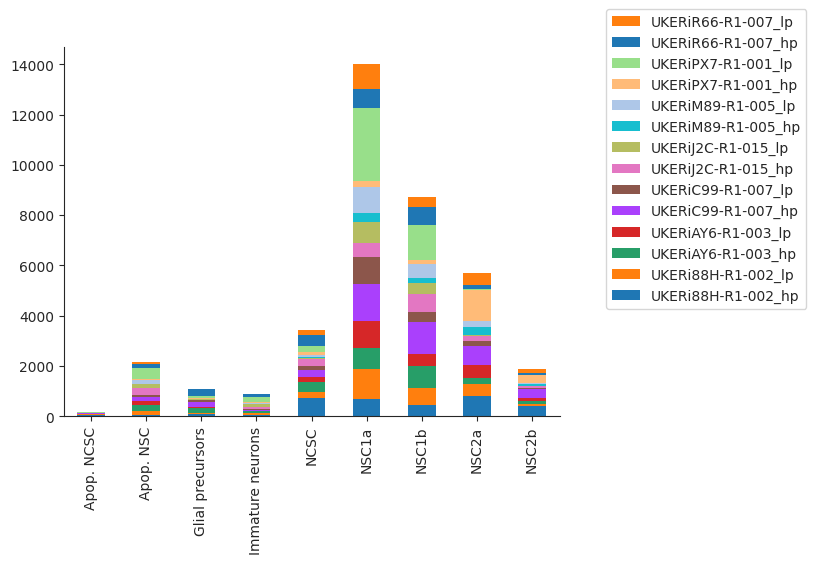

In [23]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor_unique'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/sPD_celltype_donor_unique_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

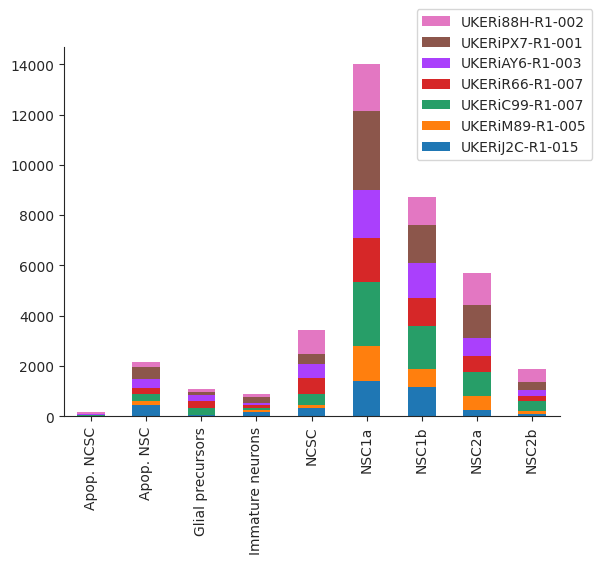

In [24]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/sPD_celltype_donor_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

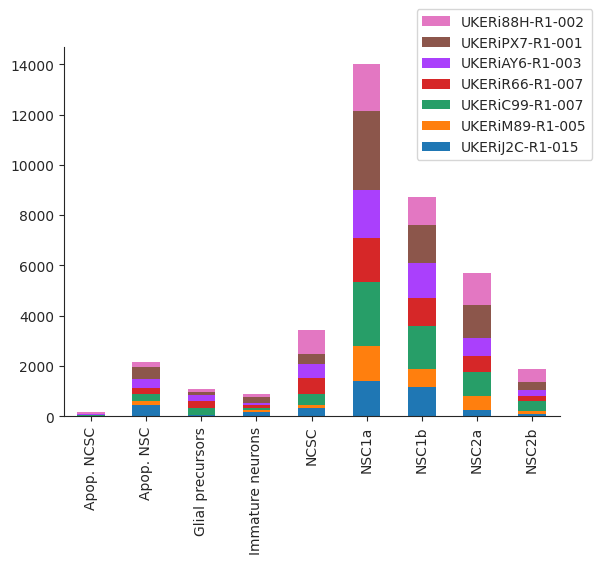

In [25]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/sPD_celltype_donor_unique_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

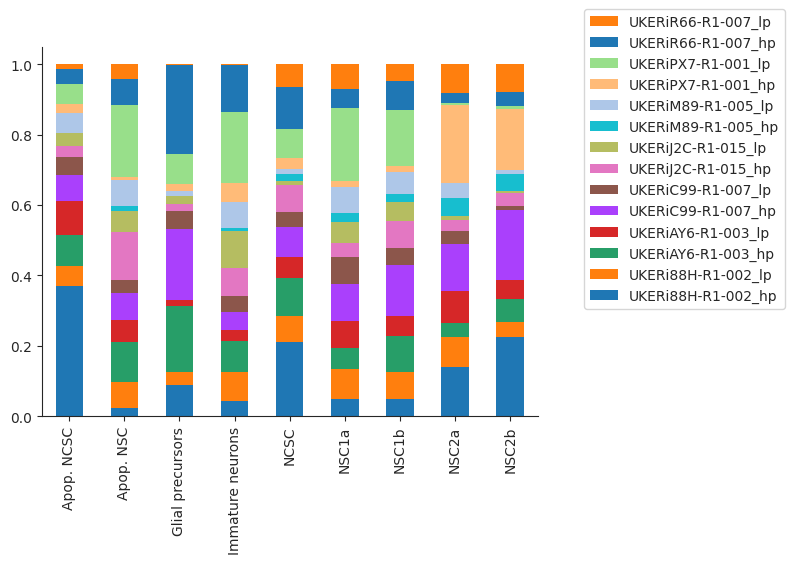

In [26]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor_unique'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/sPD_celltype_donor_composition.pdf', bbox_inches='tight')
plt.show()

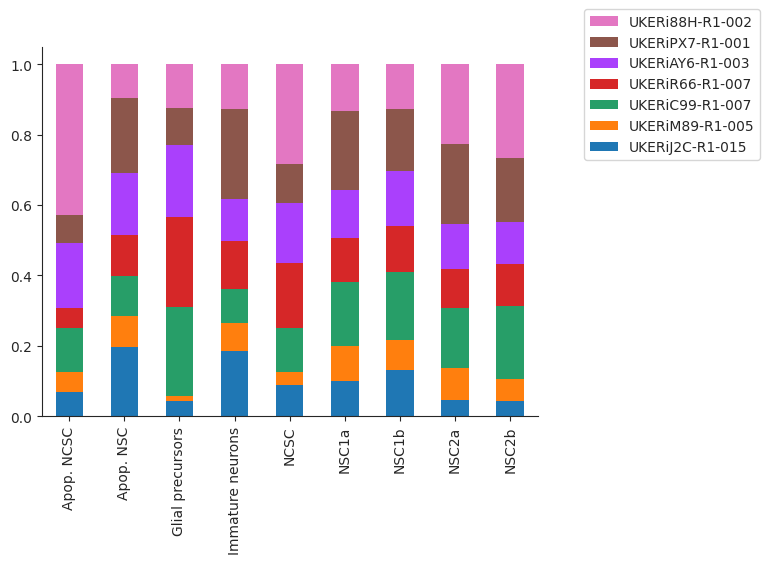

In [27]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['Donor'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col_donors, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/sPD_celltype_donor_unique_composition.pdf', bbox_inches='tight')
plt.show()

In [28]:
col_condition = adata_all.uns['cultivation_period_colors']

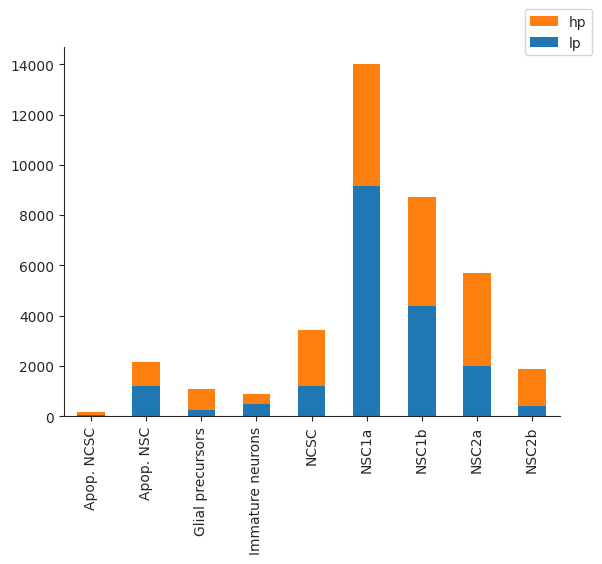

In [29]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['cultivation_period'], normalize=False).plot(kind='bar', stacked=True, legend=False, color=col_condition, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.savefig('NPCs_merge/figures/Composition/sPD_celltype_cultivation_period_composition_unnormalized.pdf', bbox_inches='tight')
plt.show()

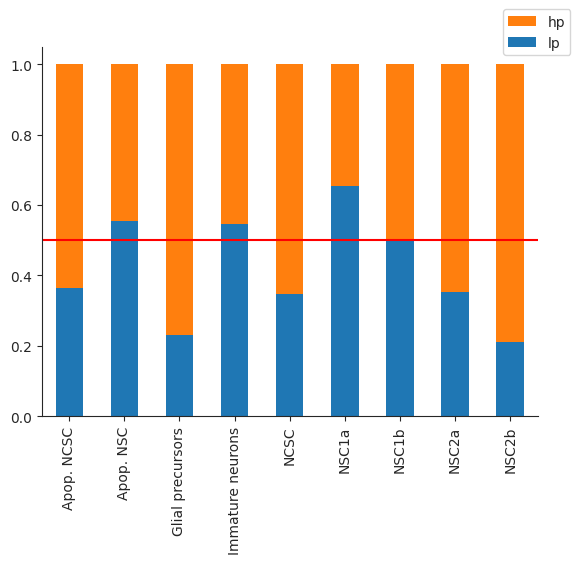

In [30]:
ax = pd.crosstab(adata.obs['cell_types'], adata.obs['cultivation_period'], normalize=0).plot(kind='bar', stacked=True, legend=False, color=col_condition, edgecolor='none')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.08,1.12,0,0), ncol=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)
plt.xlabel('')
plt.axhline(y=0.5, color='r', linestyle='-')
plt.savefig('NPCs_merge/figures/Composition/sPD_celltype_cultivation_period_composition.pdf', bbox_inches='tight')
plt.show()

## Run interference

In [16]:
# Run scCODA with each cell type as the reference
cell_types = adata.obs.cell_types.cat.categories
results_cycle = pd.DataFrame(index=cell_types, columns=["times_credible"]).fillna(0)

for ct in cell_types:
    print(f"Reference: {ct}")

    # Run inference
    model_temp = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="cultivation_period",
    reference_cell_type=ct,
    )
    sccoda_model.run_nuts(model_temp, modality_key="coda", rng_key=1234)
    
    # Select credible effects
    sccoda_model.set_fdr(model_temp, 0.2)
    cred_eff = sccoda_model.credible_effects(model_temp, modality_key="coda")
    cred_eff.index = cred_eff.index.droplevel(level=0)

    # add up credible effects
    results_cycle["times_credible"] += cred_eff.astype("int")

Reference: Apop. NCSC


Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|█████████████████████████| 11000/11000 [33:08<00:00,  5.53it/s, 191 steps of size 2.71e-02. acc. prob=0.80]


Reference: Apop. NSC


sample: 100%|█████████████████████████| 11000/11000 [35:21<00:00,  5.18it/s, 255 steps of size 2.51e-02. acc. prob=0.86]


Reference: Glial precursors


sample: 100%|█████████████████████████| 11000/11000 [39:47<00:00,  4.61it/s, 255 steps of size 2.29e-02. acc. prob=0.84]


Reference: Immature neurons


sample: 100%|█████████████████████████| 11000/11000 [32:51<00:00,  5.58it/s, 127 steps of size 2.68e-02. acc. prob=0.78]


Reference: NCSC


sample: 100%|█████████████████████████| 11000/11000 [44:13<00:00,  4.14it/s, 255 steps of size 2.12e-02. acc. prob=0.88]


Reference: NSC1a


sample: 100%|█████████████████████████| 11000/11000 [38:20<00:00,  4.78it/s, 127 steps of size 2.32e-02. acc. prob=0.90]


Reference: NSC1b


sample: 100%|█████████████████████████| 11000/11000 [33:28<00:00,  5.48it/s, 127 steps of size 2.59e-02. acc. prob=0.86]


Reference: NSC2a


sample: 100%|█████████████████████████| 11000/11000 [40:45<00:00,  4.50it/s, 255 steps of size 2.29e-02. acc. prob=0.84]


Reference: NSC2b


sample: 100%|█████████████████████████| 11000/11000 [34:18<00:00,  5.34it/s, 255 steps of size 2.63e-02. acc. prob=0.81]


In [17]:
# Calculate percentages
results_cycle["pct_credible"] = results_cycle["times_credible"]/len(cell_types)
results_cycle["is_credible"] = results_cycle["pct_credible"] > 0.5
print(results_cycle)



                  times_credible  pct_credible  is_credible
Apop. NCSC                     0      0.000000        False
Apop. NSC                      6      0.666667         True
Glial precursors               0      0.000000        False
Immature neurons               0      0.000000        False
NCSC                           0      0.000000        False
NSC1a                          8      0.888889         True
NSC1b                          7      0.777778         True
NSC2a                          1      0.111111        False
NSC2b                          4      0.444444        False


## Visualize fold change

In [19]:
#pt.pl.coda.effects_barplot(sccoda_data_mod, modality_key="coda", covariates="condition")
#plt.savefig('NPCs_merge/figures/Composition/cell_types_Celltype_composition_log2fc_ctrl.pdf', bbox_inches='tight')
#plt.show()